## 四、聚类算法

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt# matplotlib可以正常显示汉字
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
df = pd.read_csv(r'./广州二手房数据清洗结果.csv')
df

,Unnamed: 0,HouseName,Address,totalPrice,unitPrice,region,Type,area,direction,dectype,year,banta,floorType,buildyear
0,0,中海誉城北苑,香雪,223.0,39554.0,黄埔区,1室1厅,56.38,东,精装,2012,塔楼,高层,9
1,1,中海誉城北苑,香雪,320.0,36489.0,黄埔区,2室2厅,87.70,西南,精装,2012,塔楼,高层,9
2,2,中海誉城北苑,香雪,212.0,37602.0,黄埔区,1室1厅,56.38,北,精装,2012,塔楼,高层,9
3,5,中海誉城北苑,香雪,210.0,37254.0,黄埔区,1室1厅,56.37,东北,精装,2013,塔楼,高层,8
4,6,中海誉城北苑,香雪,446.0,36489.0,黄埔区,3室1厅,122.23,南,精装,2015,塔楼,高层,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50695,64938,华仙楼,沙太南,275.0,29954.0,越秀区,3室2厅,91.81,东南,简装,1999,塔楼,高层,22
50696,64939,华仙楼,沙太南,320.0,34855.0,越秀区,3室2厅,91.81,南 北,其他,1999,塔楼,高层,22
50697,64941,田美居,同德围,210.0,28611.0,越秀区,2室1厅,73.40,南,简装,1999,塔楼,高层,22
50698,64942,田美居,同德围,184.0,25035.0,越秀区,2室1厅,73.50,南,简装,1999,塔楼,高层,22


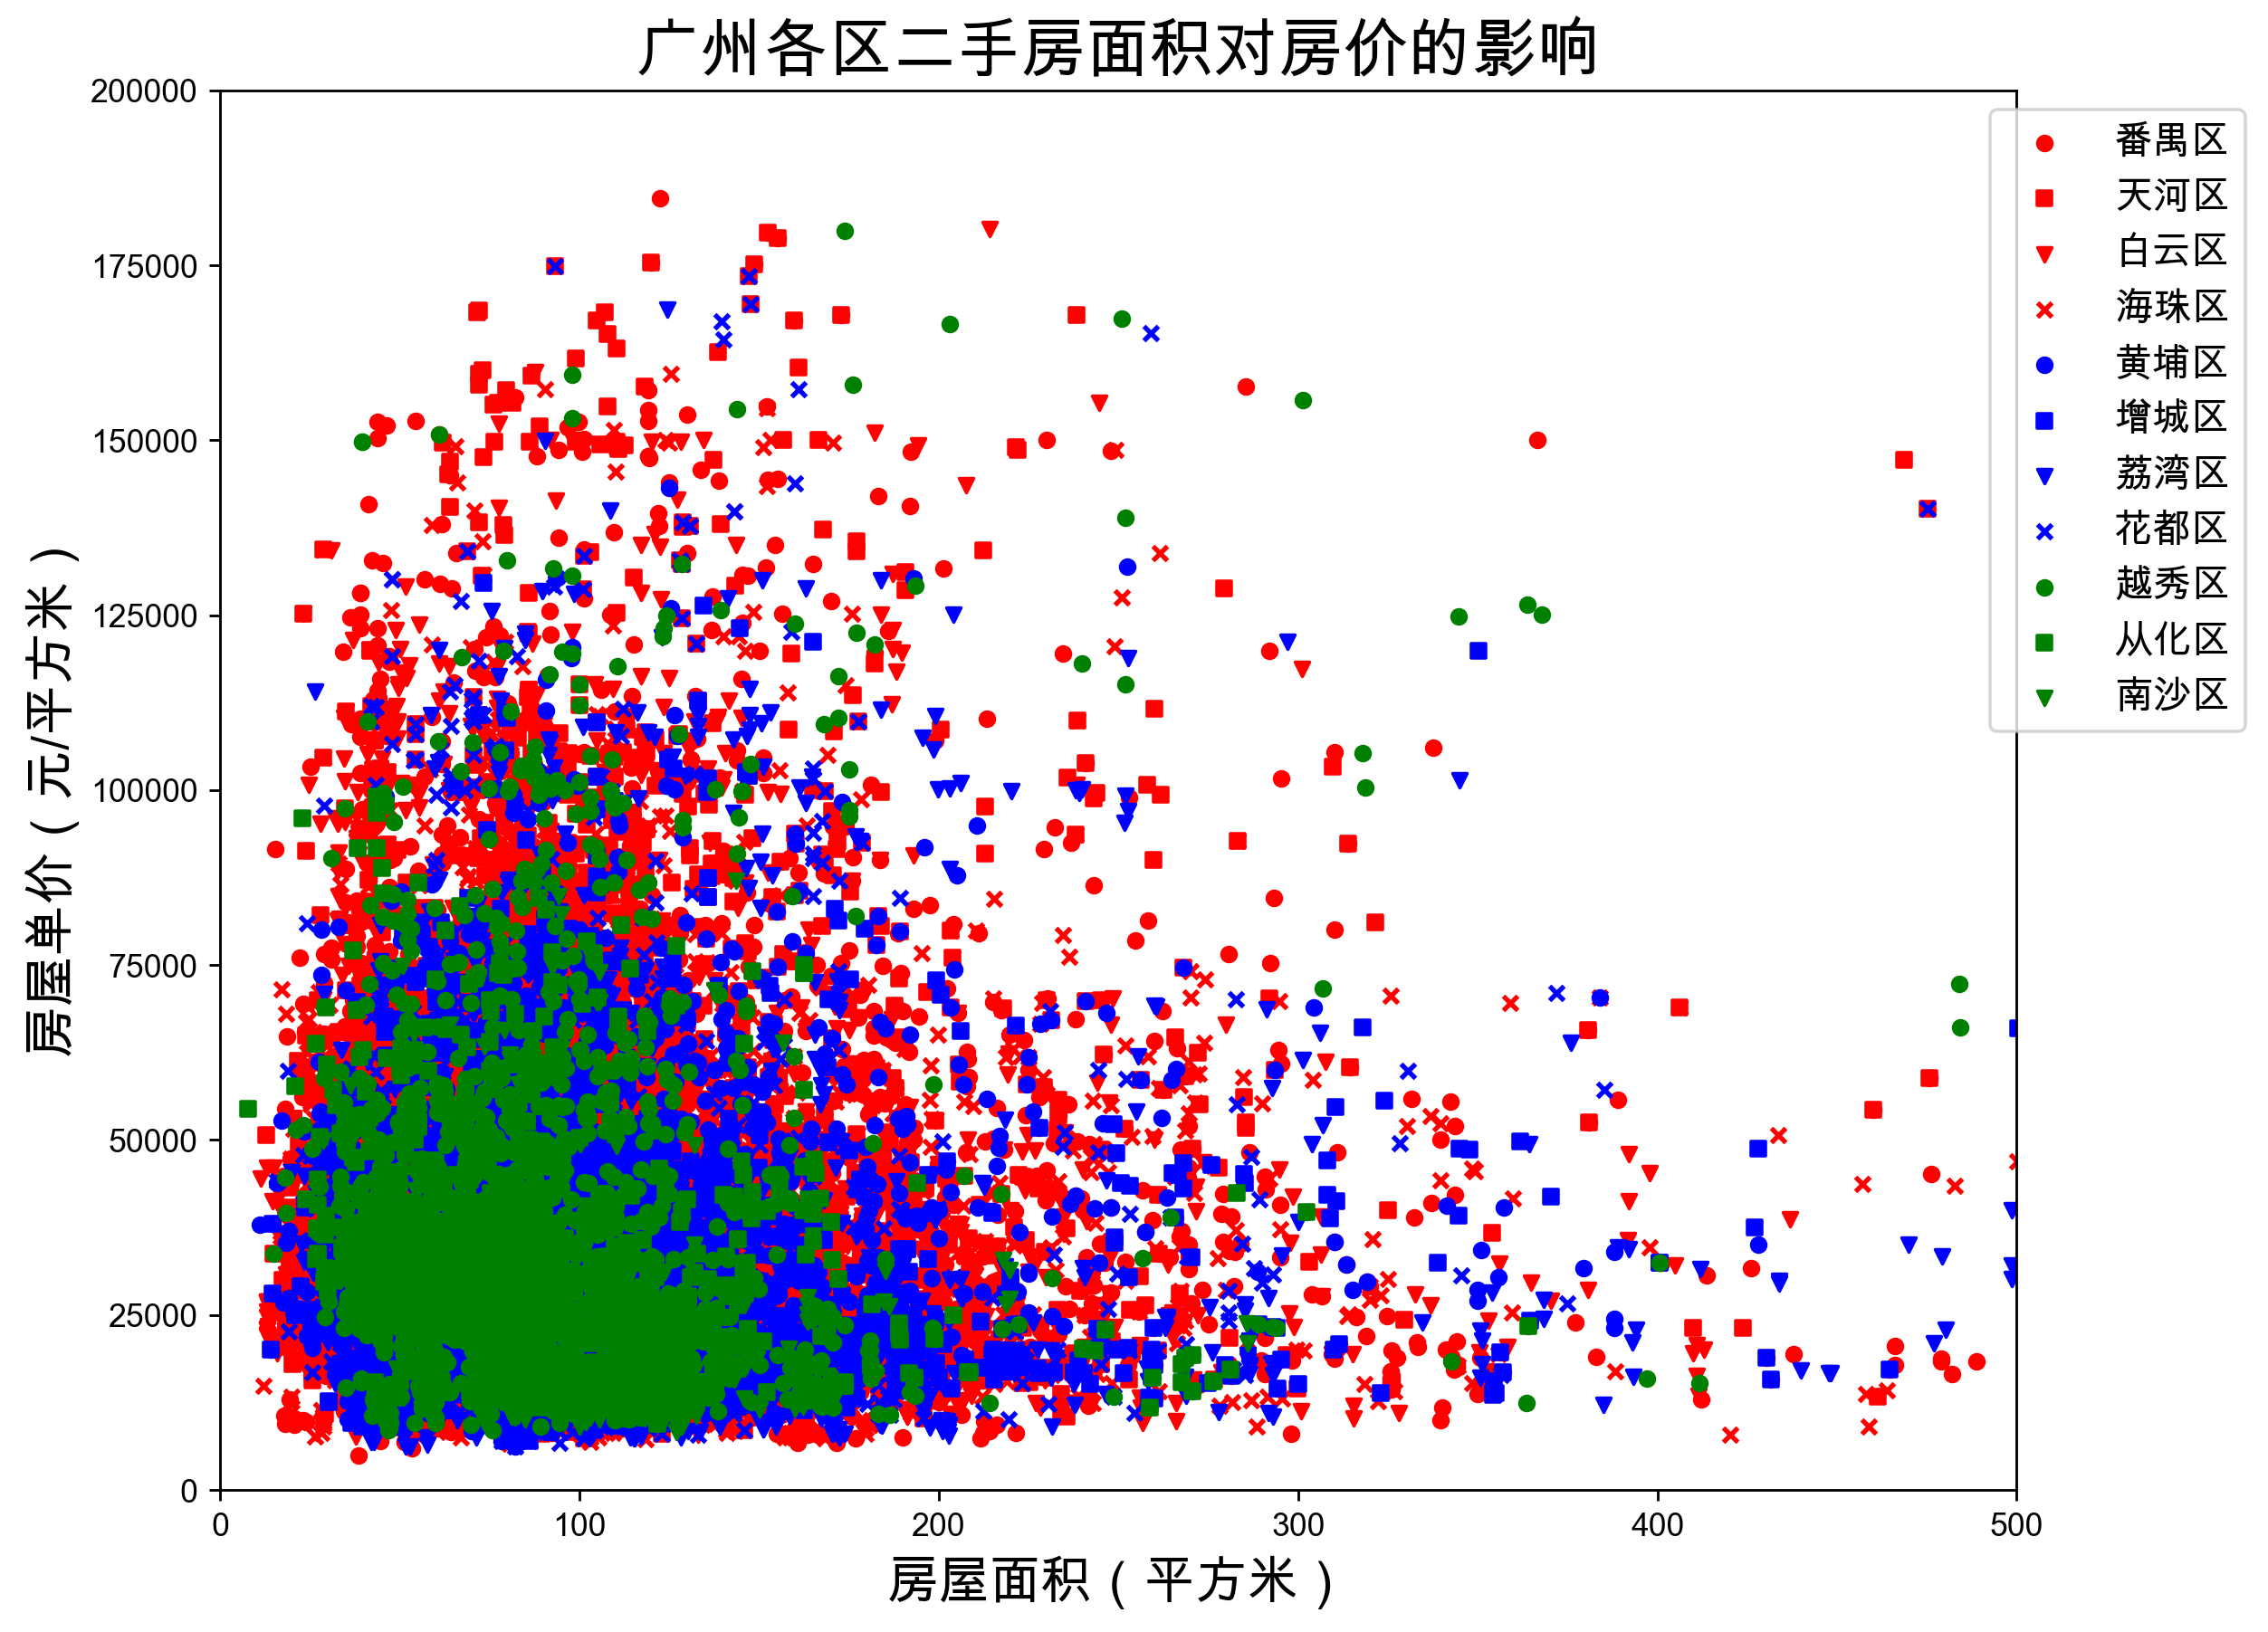

In [3]:
def plot_scatter():
    plt.figure(figsize=(10,8),dpi=256)
    colors = ['red', 'red', 'red', 'red',
              'blue', 'blue', 'blue', 'blue',
              'green', 'green', 'green']
    addr_dist = ['番禺区','天河区','白云区','海珠区',
                 '黄埔区','增城区','荔湾区','花都区',
                 '越秀区', '从化区','南沙区']
    markers = ['o','s','v','x',
               'o', 's', 'v', 'x',
               'o', 's', 'v']
#     print(addr_dist)
    for i in range(11):
        x = df.loc[df['region'] == addr_dist[i]]['area']
        y = df.loc[df['region'] == addr_dist[i]]['unitPrice']
        plt.scatter(x, y, c=colors[i], s=20, label=addr_dist[i], marker=markers[i])
 
 
    plt.legend(loc=1,bbox_to_anchor=(1.138,1.0),fontsize=12)
    plt.xlim(0,500)
    plt.ylim(0,200000)
    plt.title('广州各区二手房面积对房价的影响',fontsize=20)
    plt.xlabel('房屋面积（平方米）',fontsize=16)
    plt.ylabel('房屋单价（元/平方米）',fontsize=16)
 
plot_scatter()

### 按照平均房价的顺序排列，红色为价格第一梯队，蓝色为价格第二梯队，绿色为价格第三梯队。从散点图中可以观察到第一梯队的红色散点相对偏向左上方，各个梯队相比于上一梯队整体向下偏移。可以看出番禺、天河、白云、海珠的房价单价偏高。可以看出越靠近市中心的房屋单价每平方面积越贵。